### Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset

In [ ]:
def import_dataset():
  for _ in range(4):
    uploaded = files.upload()
  income_data = pd.read_csv('income_data.csv')
  user_data = pd.read_csv('user_data.csv')
  task_data = pd.read_csv('task_data.csv')
  log_data = pd.read_csv('log_data.csv')
  return income_data, user_data, task_data, log_data

In [ ]:
income_data, user_data, task_data, log_data = import_dataset()

Saving task_data.csv to task_data (1).csv


Saving user_data.csv to user_data (1).csv


Saving income_data.csv to income_data (1).csv


Saving log_data.csv to log_data.csv


In [ ]:
log_data = pd.read_csv('log_data.csv')

## TASK - 1
Provide of a detailed analysis of a worker interacting with Toloka Tasks Tab (url finish with tasks), provide an estimate duration of a task either completion or working \sum t_i

Column 'event' contains these 4 catagories: 'TABUPDATED', 'WEBREQUEST', 'TABACTIVATED', 'TABCLOSED'


*   TABACTIVATED: Timestamp when the tab was activated / initiated
*   TABUPDATED: Timestamp when the worker navigates the tab to a new URL, or modify other properties of the tab
*   TABCLOSED: Timestamp when the tab was closed or exited
*   WEBREQUEST: Timestamp when a communicative message that is transmitted between the client, or web browsers, to the server

1. starting time of each interval: webrequest or tabactivated
2. ending time of each interval: tabclosed




In [ ]:
log_data.head()

,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
0,0,232,1699065816,TABUPDATED,1668886726463,https://toloka.yandex.com/signup,48,0.0,0.0,0.0,0.0,0.0
1,1,233,1699065816,WEBREQUEST,1668886726797,https://toloka.yandex.com/signup,48,NaN,NaN,NaN,NaN,NaN
2,2,234,1699065816,TABUPDATED,1668886727665,https://toloka.yandex.com/,48,0.0,0.0,0.0,0.0,0.0
3,3,235,1699065816,WEBREQUEST,1668886727848,https://toloka.yandex.com/,48,NaN,NaN,NaN,NaN,NaN
4,4,236,1699065816,TABUPDATED,1668886728408,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = log_data[log_data['url'].str.startswith('https://toloka.yandex.com/tasks', na = False)]
df.head(20)

,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
4,4,236,1699065816,TABUPDATED,1668886728408,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0
5,5,237,1699065816,WEBREQUEST,1668886728510,https://toloka.yandex.com/tasks,48,NaN,NaN,NaN,NaN,NaN
7,7,239,1699065816,TABUPDATED,1668886738800,https://toloka.yandex.com/tasks,48,267.0,4.0,3.0,2.0,0.0
9,9,241,1699065816,TABUPDATED,1668886888745,https://toloka.yandex.com/tasks,48,267.0,11.0,10.0,2.0,0.0
11,11,243,1699065816,TABUPDATED,1668886942803,https://toloka.yandex.com/tasks,48,NaN,NaN,NaN,NaN,NaN
13,13,245,1699065816,TABUPDATED,1668886974590,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0
15,15,247,1699065816,TABUPDATED,1668887067760,https://toloka.yandex.com/tasks,53,0.0,0.0,0.0,0.0,0.0
16,16,248,1699065816,WEBREQUEST,1668887068121,https://toloka.yandex.com/tasks,53,NaN,NaN,NaN,NaN,NaN
22,22,254,1699065816,TABUPDATED,1668887105018,https://toloka.yandex.com/tasks,48,0.0,5.0,5.0,0.0,0.0
30,30,262,1699065816,TABUPDATED,1668887210613,https://toloka.yandex.com/tasks,48,0.0,2.0,1.0,1.0,0.0


In [ ]:
df['uid'].unique()

array([1699065816, 1718416044, 1718146027,         -1, 1675921760,
       1709755371, 1458049517, 1703905621, 1674749132, 1713698815,
       1316040758, 1706440161, 1490584733, 1684019585, 1430094402,
       1429235843, 1716528528, 1714073899, 1710096477, 1725201772,
       1725259597])

In [ ]:
df2 = df.loc[df['uid']== 1699065816]
print(df2.shape)
df2.head()
print(df2[['tab_id', 'event', 'timestamp']])

(44, 12)
     tab_id         event      timestamp
4        48    TABUPDATED  1668886728408
5        48    WEBREQUEST  1668886728510
7        48    TABUPDATED  1668886738800
9        48    TABUPDATED  1668886888745
11       48    TABUPDATED  1668886942803
13       48    TABUPDATED  1668886974590
15       53    TABUPDATED  1668887067760
16       53    WEBREQUEST  1668887068121
22       48    TABUPDATED  1668887105018
30       48    TABUPDATED  1668887210613
32       48    TABUPDATED  1668887259012
34       48    TABUPDATED  1668887283278
36       48    TABUPDATED  1668887320119
37       48    WEBREQUEST  1668887401632
39       48    TABUPDATED  1668887455650
41       48    TABUPDATED  1668887471809
42       48    WEBREQUEST  1668887473691
51       48    TABUPDATED  1668889086228
54       48    TABUPDATED  1668889100139
56       48    TABUPDATED  1668889307237
59        2    TABUPDATED  1669052086460
60        2    WEBREQUEST  1669052086837
63       45    WEBREQUEST  1669054587404
65     

In [ ]:
dfn = log_data.loc[log_data['uid']== 1699065816]
print(dfn.shape)
dfn.head()

(138, 12)


,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
0,0,232,1699065816,TABUPDATED,1668886726463,https://toloka.yandex.com/signup,48,0.0,0.0,0.0,0.0,0.0
1,1,233,1699065816,WEBREQUEST,1668886726797,https://toloka.yandex.com/signup,48,NaN,NaN,NaN,NaN,NaN
2,2,234,1699065816,TABUPDATED,1668886727665,https://toloka.yandex.com/,48,0.0,0.0,0.0,0.0,0.0
3,3,235,1699065816,WEBREQUEST,1668886727848,https://toloka.yandex.com/,48,NaN,NaN,NaN,NaN,NaN
4,4,236,1699065816,TABUPDATED,1668886728408,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfn = dfn.sort_values('timestamp')
dfn = dfn.reset_index()

In [ ]:
dfn['timestamp']

0      1668886726463
1      1668886726797
2      1668886727665
3      1668886727848
4      1668886728408
           ...      
133    1669069591132
134    1669069591637
135    1669069591925
136    1669069592679
137    1669069634354
Name: timestamp, Length: 138, dtype: int64

In [ ]:
print(dfn[['url', 'event', 'timestamp', 'tab_id']])

                                  url       event      timestamp  tab_id
0    https://toloka.yandex.com/signup  TABUPDATED  1668886726463      48
1    https://toloka.yandex.com/signup  WEBREQUEST  1668886726797      48
2          https://toloka.yandex.com/  TABUPDATED  1668886727665      48
3          https://toloka.yandex.com/  WEBREQUEST  1668886727848      48
4     https://toloka.yandex.com/tasks  TABUPDATED  1668886728408      48
..                                ...         ...            ...     ...
134  https://toloka.yandex.com/signup  WEBREQUEST  1669069591132      64
135        https://toloka.yandex.com/  TABUPDATED  1669069591637      64
136        https://toloka.yandex.com/  WEBREQUEST  1669069591925      64
137   https://toloka.yandex.com/tasks  TABUPDATED  1669069592679      64
138        https://toloka.ai/tolokers  TABUPDATED  1669069634354      64

[138 rows x 4 columns]


In [ ]:
dfn.sort_values('timestamp')
#first find out the timestamp corresponding to the task tab url
a = dfn.index[dfn['url'] == 'https://toloka.yandex.com/tasks'].tolist()
print(a)

for i in a:
  start = dfn['timestamp'][i]
  if dfn['url'][i+1] != 'https://toloka.yandex.com/tasks':
    end = dfn['timestamp'][i+1]
    time = (end - start)/60
    print('Interval ' + str(i) + ' : ' + str(time) + ' minutes')
  else:
    continue
#find the time coressponding to when the url chnages from the task tab

[4, 5, 7, 9, 11, 13, 15, 16, 22, 30, 32, 34, 36, 37, 39, 41, 42, 51, 54, 56, 59, 60, 63, 65, 67, 74, 75, 77, 82, 86, 87, 97, 100, 102, 104, 105, 107, 108, 109, 111, 112, 115, 120, 137]
Interval 5 : 119.88333333333334 minutes
Interval 7 : 2260.85 minutes
Interval 9 : 878.9166666666666 minutes
Interval 11 : 0.03333333333333333 minutes
Interval 13 : 243.56666666666666 minutes
Interval 16 : 266.7 minutes
Interval 22 : 110.3 minutes
Interval 30 : 656.9166666666666 minutes
Interval 32 : 378.6166666666667 minutes
Interval 34 : 445.05 minutes
Interval 37 : 252.05 minutes
Interval 39 : 209.38333333333333 minutes
Interval 42 : 752.0333333333333 minutes
Interval 51 : 94.0 minutes
Interval 54 : 483.53333333333336 minutes
Interval 56 : 22981.783333333333 minutes
Interval 60 : 303.8666666666667 minutes
Interval 63 : 98.45 minutes
Interval 65 : 3895.55 minutes
Interval 67 : 0.03333333333333333 minutes
Interval 75 : 428.6 minutes
Interval 77 : 0.016666666666666666 minutes
Interval 82 : 1067.4666666666

In [ ]:
nt = dfn.index[dfn['url'] != 'https://toloka.yandex.com/tasks'].tolist()
t = dfn.index[dfn['url'] == 'https://toloka.yandex.com/tasks'].tolist()[0]
print(t)
nt = [i for i in nt if i >= t]
nt.insert(0,3)
print(nt)

4
[3, 6, 8, 10, 12, 14, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 33, 35, 38, 40, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 57, 58, 61, 62, 64, 66, 68, 69, 70, 71, 72, 75, 77, 78, 79, 80, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 102, 105, 109, 112, 113, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137]


In [ ]:
dfn.head()

,level_0,index,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
0,0,0,0,232,1699065816,TABUPDATED,1668886726463,https://toloka.yandex.com/signup,48,0.0,0.0,0.0,0.0,0.0
1,1,1,1,233,1699065816,WEBREQUEST,1668886726797,https://toloka.yandex.com/signup,48,NaN,NaN,NaN,NaN,NaN
2,2,2,2,234,1699065816,TABUPDATED,1668886727665,https://toloka.yandex.com/,48,0.0,0.0,0.0,0.0,0.0
3,3,3,3,235,1699065816,WEBREQUEST,1668886727848,https://toloka.yandex.com/,48,NaN,NaN,NaN,NaN,NaN
4,4,4,4,236,1699065816,TABUPDATED,1668886728408,https://toloka.yandex.com/tasks,48,0.0,0.0,0.0,0.0,0.0


In [ ]:
t = []
evs = ['TABACTIVATED', 'TABCLOSED']
start = 3
for i in range(1, len(nt)):
  if (nt[i]-1 <= nt[start]+1):
    pass
  elif (nt[i]-1 in nt) or (nt[start]+1 in nt):
    pass
  elif (dfn['event'][nt[i]-1] in evs) or (dfn['event'][nt[start]+1] in evs):
    pass
  else:
    time = (dfn['timestamp'][nt[i]-1] - dfn['timestamp'][nt[start]+1])/60
    print(nt[i]-1, nt[start]+1)
    if time < 120:
      t.append(time)
  start = i
print(t)

16 15
37 36
42 41
60 59
86 85
104 103
111 110
[6.016666666666667, 31.366666666666667, 6.283333333333333, 7.15, 6.216666666666667]


In [ ]:
uniq = list(df['uid'].unique())
uniq.remove(-1)
uniq.remove(1703905621)
uniq.remove(1430094402)
print(uniq)

[1699065816, 1718416044, 1718146027, 1675921760, 1709755371, 1458049517, 1674749132, 1713698815, 1316040758, 1706440161, 1490584733, 1684019585, 1429235843, 1716528528, 1714073899, 1710096477, 1725201772, 1725259597]


In [ ]:
def task_tab_navigation(user_id):
  dfn = log_data.loc[log_data['uid']== user_id]
  dfn = dfn.sort_values('timestamp')
  dfn = dfn.reset_index()
  nt = dfn.index[dfn['url'] != 'https://toloka.yandex.com/tasks'].tolist()
  l = dfn.index[dfn['url'] == 'https://toloka.yandex.com/tasks'].tolist()[0]
  nt = [i for i in nt if i >= l]
  nt.insert(0,3)
  t = []
  evs = ['TABACTIVATED', 'TABCLOSED']
  start = 3
  for i in range(1, len(nt)):
    if (nt[i]-1 <= nt[start]+1):
      pass
    elif (nt[i]-1 in nt) or (nt[start]+1 in nt):
      pass
    elif (dfn['event'][nt[i]-1] in evs) or (dfn['event'][nt[start]+1] in evs):
      pass
    else:
      time = (dfn['timestamp'][nt[i]-1] - dfn['timestamp'][nt[start]+1])/60
      # print(nt[i]-1, nt[start]+1)
      if time < 180:
        t.append(time)
    start = i
  if len(t) ==0:
    return 0
  else:
    avg_time = sum(t)/len(t)
    return avg_time
  # print("Average Task tab navigation duration for user " + str(user_id) + ' is ' + str(avg_time) + ' minutes.' )

In [ ]:
duration = []
id = []
for i in uniq:
  val = task_tab_navigation(i)
  duration.append(val)
  id.append(i)
k = pd.DataFrame({ 'user_id': id, 'Duration': duration})

In [ ]:
k

,user_id,Duration
0,1699065816,11.406667
1,1718416044,5.791667
2,1718146027,7.766667
3,1675921760,109.011145
4,1709755371,2.716667
5,1458049517,0.000000
6,1674749132,85.151515
7,1713698815,7.991667
8,1316040758,142.350000
9,1706440161,7.800000


<Figure size 1008x1008 with 0 Axes>

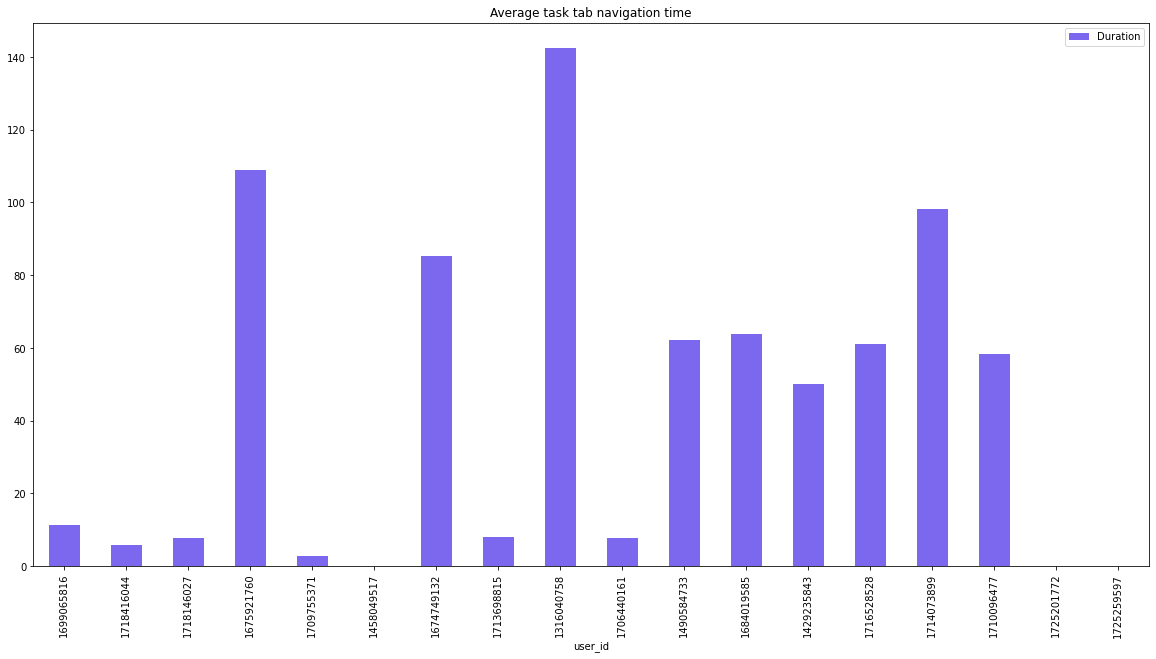

In [ ]:
plt.figure(figsize=(14, 14))
k.plot(x = 'user_id', y = 'Duration', kind='bar', title='Average task tab navigation time', color='mediumslateblue')
plt.gcf().set_size_inches(20, 10)

In [ ]:
task_tab_navigation(1699065816)

Average Task tab navigation duration for user 1699065816 is 11.406666666666666 minutes.


In [ ]:
task_tab_navigation(1718416044)

Average Task tab navigation duration for user 1718416044 is 5.791666666666667 minutes.


In [ ]:
task_tab_navigation(1718146027)

Average Task tab navigation duration for user 1718146027 is 7.766666666666667 minutes.


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dfn)

     level_0  index  Unnamed: 0    id         uid         event  \
0          0      0           0   232  1699065816    TABUPDATED   
1          1      1           1   233  1699065816    WEBREQUEST   
2          2      2           2   234  1699065816    TABUPDATED   
3          3      3           3   235  1699065816    WEBREQUEST   
4          4      4           4   236  1699065816    TABUPDATED   
5          5      5           5   237  1699065816    WEBREQUEST   
6          6      6           6   238  1699065816    TABUPDATED   
7          7      7           7   239  1699065816    TABUPDATED   
8          8      8           8   240  1699065816    TABUPDATED   
9          9      9           9   241  1699065816    TABUPDATED   
10        10     10          10   242  1699065816    TABUPDATED   
11        11     11          11   243  1699065816    TABUPDATED   
12        12     12          12   244  1699065816    TABUPDATED   
13        13     13          13   245  1699065816    TABUPDATE

In [ ]:
dfn['timestamp']

0      1668886726463
1      1668886726797
2      1668886727665
3      1668886727848
4      1668886728408
           ...      
134    1669069591132
135    1669069591637
136    1669069591925
137    1669069592679
138    1669069634354
Name: timestamp, Length: 138, dtype: int64

In [ ]:
dfn.reset_index()

In [ ]:
dfn.sort_values('timestamp')
#first find out the timestamp corresponding to the task tab url
a = dfn.index[dfn['url'] == 'https://toloka.yandex.com/tasks'].tolist()
print(a)

# for i in range(len(a)):
#   start = dfn['timestamp'][a[i]]
#   if dfn['url'][a[i]+1] == 'https://toloka.yandex.com/tasks':
#     print(str(i) + ' next url is toloka')
#   else:
#     end = dfn['timestamp'][a[i]]
#     time = (end - start)/60
#     print('Interval ' + str(i) + ' : ' + str(time) + ' minutes')

# for i in range(len(a)):
#   start = dfn['timestamp'][a[i]]
#   for j in range(len(dfn)):
#     if dfn['url'][j+1] == 'https://toloka.yandex.com/tasks':
#       print(str(i) + ' next url is toloka')
#     else:
#       end = dfn['timestamp'][j]
#       time = (end - start)/60
#       print('Interval ' + str(i) + ' : ' + str(time) + ' minutes')
#     break


for j in range(len(dfn)):
  start = dfn['timestamp'][a[i]]
  if dfn['url'][j+1] == 'https://toloka.yandex.com/tasks':
    print(str(i) + ' next url is toloka')
  else:
    end = dfn['timestamp'][j]
    time = (end - start)/60
    print('Interval ' + str(i) + ' : ' + str(time) + ' minutes')


In [ ]:
m = 1
n = len(dfn)
while m < n:
  indices = np.where(dfn['url'] == 'https://toloka.yandex.com/tasks')
  s = dfn['timestamp'][indices[0][0]]
  idx = np.where(dfn['url'] != 'https://toloka.yandex.com/tasks')
  e = dfn['timestamp'][idx[0][0]-1]
  t = (e-s)/60
  m = idx[0][0]
# df.loc[df['a'] == 11,'b']
dfn['timestamp'].loc[dfn['url']== 'https://toloka.yandex.com/tasks'][1]

In [ ]:
indices = np.where(dfn['url'] == 'https://toloka.yandex.com/tasks')
print(indices[0][0])
print(dfn['timestamp'][indices[0][0]])

4
1668886728408


In [ ]:
for i in range(len(a)):
  print(str(dfn['timestamp'][a[i]]) + ' ' + str(dfn['url'][a[i]]) + ' ' + str(dfn['event'][a[i]+1]))
  print(str(dfn['timestamp'][a[i]+1]) + ' ' + str(dfn['url'][a[i]+1]) + ' ' + str(dfn['event'][a[i]+1]))

1668886728408 https://toloka.yandex.com/tasks WEBREQUEST
1668886728510 https://toloka.yandex.com/tasks WEBREQUEST
1668886728510 https://toloka.yandex.com/tasks TABUPDATED
1668886735703 NON-TOLOKA TABUPDATED
1668886738800 https://toloka.yandex.com/tasks TABUPDATED
1668886874451 NON-TOLOKA TABUPDATED
1668886888745 https://toloka.yandex.com/tasks TABUPDATED
1668886941480 NON-TOLOKA TABUPDATED
1668886942803 https://toloka.yandex.com/tasks TABUPDATED
1668886942805 NON-TOLOKA TABUPDATED
1668886974590 https://toloka.yandex.com/tasks TABUPDATED
1668886989204 NON-TOLOKA TABUPDATED
1668887067760 https://toloka.yandex.com/tasks WEBREQUEST
1668887068121 https://toloka.yandex.com/tasks WEBREQUEST
1668887068121 https://toloka.yandex.com/tasks TABUPDATED
1668887084123 https://toloka.yandex.com/task/34554932/00020f4434--6379322bd3a4cf6101a4e754 TABUPDATED
1668887105018 https://toloka.yandex.com/tasks TABUPDATED
1668887111636 NON-TOLOKA TABUPDATED
1668887210613 https://toloka.yandex.com/tasks TABUPDATE

In [ ]:
t1 = ( 1668886728510 - 1668886728408)/60
print(t1)

1.7


In [ ]:
df2['event']

4        TABUPDATED
5        WEBREQUEST
7        TABUPDATED
9        TABUPDATED
11       TABUPDATED
13       TABUPDATED
15       TABUPDATED
16       WEBREQUEST
22       TABUPDATED
30       TABUPDATED
32       TABUPDATED
34       TABUPDATED
36       TABUPDATED
37       WEBREQUEST
39       TABUPDATED
41       TABUPDATED
42       WEBREQUEST
51       TABUPDATED
54       TABUPDATED
56       TABUPDATED
59       TABUPDATED
60       WEBREQUEST
63       WEBREQUEST
65       TABUPDATED
67     TABACTIVATED
74       TABUPDATED
75     TABACTIVATED
77     TABACTIVATED
82       TABUPDATED
86       TABUPDATED
87       WEBREQUEST
97       TABUPDATED
100      TABUPDATED
102    TABACTIVATED
104      TABUPDATED
105      WEBREQUEST
107       TABCLOSED
108      TABUPDATED
109      WEBREQUEST
111      TABUPDATED
112      WEBREQUEST
115      TABUPDATED
120      TABUPDATED
137      TABUPDATED
Name: event, dtype: object

In [ ]:
for i in range(0,len(df2)-1):
  start = df2['timestamp'].iloc[i]
  end = df2['timestamp'].iloc[i+1]
  time = (end - start)/3600
  print("Duration for interval " + str(i) +' : ' +str(time))

Duration for interval 0 : 0.028333333333333332
Duration for interval 1 : 2.8583333333333334
Duration for interval 2 : 41.65138888888889
Duration for interval 3 : 15.016111111111112
Duration for interval 4 : 8.829722222222221
Duration for interval 5 : 25.880555555555556
Duration for interval 6 : 0.10027777777777777
Duration for interval 7 : 10.249166666666667
Duration for interval 8 : 29.331944444444446
Duration for interval 9 : 13.444166666666666
Duration for interval 10 : 6.740555555555556
Duration for interval 11 : 10.233611111111111
Duration for interval 12 : 22.6425
Duration for interval 13 : 15.005
Duration for interval 14 : 4.488611111111111
Duration for interval 15 : 0.5227777777777778
Duration for interval 16 : 447.9269444444444
Duration for interval 17 : 3.8641666666666667
Duration for interval 18 : 57.52722222222222
Duration for interval 19 : 45216.450833333336
Duration for interval 20 : 0.10472222222222222
Duration for interval 21 : 694.6019444444445
Duration for interval 22

In the above results, when we are quuering the time duration between task_updated for each user, we can see that we are getting large amounts of time in hours. So it becomes very difficult to exactly understand if these time durations are real or not. Since, it is not possible to have such large duration of task navigation time, I am going to use a different strategy.

### New Approach:
Use a threshold of duration to limit the maximum duration of task navigation and find the average task navigation time for each user.

In [ ]:
def avg_navigate_time(user_id, threshold):
  df2 = df.loc[df['uid']== user_id]
  df2 = df2.sort_values('timestamp')
  time_list = []
  for i in range(0,len(df2)-1):
    start = df2['timestamp'].iloc[i]
    end = df2['timestamp'].iloc[i+1]
    time = (end - start)/60
    # print("Duration for interval " + str(i) +' : ' +str(time))
    time_list.append(time)
  new_time = []
  for i in range(len(time_list)):
    if time_list[i] <= threshold:
      new_time.append(time_list[i])
  if len(df2) < 2:
    print('The user only has one log entry for Task Tab, hence we cannot find their average navigation time.')
  elif len(new_time) == 0:
    print('Please provide a larger threshold, as there are zero time intervals below the threshold.')
  else:
    avg_time = sum(new_time)/len(new_time)
    print('Average time taken by user ' + str(user_id) + ' to navigate Task tab: ' +str(avg_time) + ' Minutes')

In [ ]:
df['uid'].unique()

array([1699065816, 1718416044, 1718146027,         -1, 1675921760,
       1709755371, 1458049517, 1703905621, 1674749132, 1713698815,
       1316040758, 1706440161, 1490584733, 1684019585, 1430094402,
       1429235843, 1716528528, 1714073899, 1710096477, 1725201772,
       1725259597])

In [ ]:

avg_navigate_time(1716528528, 40)

Average time taken by user 1716528528 to navigate Task tab: 21.153921568627453 Minutes


In [ ]:
avg_navigate_time(1458049517, 10)

The user only has one log entry for Task Tab, hence we cannot find their average navigation time.


In [ ]:
avg_navigate_time(1458049517, 10)

The user only has one log entry for Task Tab, hence we cannot find their average navigation time.


In [ ]:
avg_navigate_time(1718416044, 10)

Average time taken by user 1718416044 to navigate Task tab: 6.322222222222222 Hours


In [ ]:
avg_navigate_time(1706440161, 10)

Average time taken by user 1706440161 to navigate Task tab: 4.7 Hours


In [ ]:
avg_navigate_time(1710096477, 10)

Average time taken by user 1710096477 to navigate Task tab: 5.021794871794872 Hours


In [ ]:
avg_navigate_time(1703905621, 10)

Please provide a larger threshold, as there are zero time intervals below the threshold.


In [ ]:
avg_navigate_time(1703905621, 200)

Average time taken by user 1703905621 to navigate Task tab: 190.16666666666666 Hours


In [ ]:
df['event'].unique()

array(['TABUPDATED', 'WEBREQUEST', 'TABACTIVATED', 'TABCLOSED'],
      dtype=object)

## TASK - 2
Analysis and patterns between workers that interacted just one time with a task and with multiple times

In [ ]:
## finding out the tasks that a worker just interacted once
df3 = log_data[log_data['url'].str.startswith('https://toloka.yandex.com/task/', na = False)]
df3.head()

,Unnamed: 0,id,uid,event,timestamp,url,tab_id,scroll_count,blur_count,focus_count,click_count,keypress_count
17,17,249,1699065816,TABUPDATED,1668887084123,https://toloka.yandex.com/task/34554932/00020f...,53,0.0,1.0,0.0,0.0,0.0
18,18,250,1699065816,WEBREQUEST,1668887085496,https://toloka.yandex.com/task/34554932/00020f...,53,NaN,NaN,NaN,NaN,NaN
20,20,252,1699065816,TABUPDATED,1668887098813,https://toloka.yandex.com/task/34554932/00020f...,53,0.0,3.0,2.0,0.0,0.0
24,24,256,1699065816,TABUPDATED,1668887116422,https://toloka.yandex.com/task/34554932/00020f...,53,0.0,6.0,6.0,0.0,0.0
25,25,257,1699065816,TABCLOSED,1668887117457,https://toloka.yandex.com/task/34554932/00020f...,53,NaN,NaN,NaN,NaN,NaN


In [ ]:
task_data.head()

,Unnamed: 0,project_id,pool_id,title,description,pool_startedAt,hasInstructions,mayContainAdultContent,requesterID,requesterTrusted,lang,grade,averageAcceptanceTimeSec,moneyAvgHourly,moneyMed,moneyTop10,moneyMax3,reward
0,0,0,0,title,NaN,2022-09-16T22:16:48.000Z,0,1,requesterID,1,EN,4.30,NaN,0.54,NaN,NaN,NaN,0.0
1,1,2338,36616149,Ekran görüntüsünde yetişkin içerik var mı?,"Bu, ""Ekran görüntüsünde yetişkin içerik var mı...",2022-11-29T12:19:54.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.52,NaN,0.00,0.00,0.09,1.19,0.0
2,2,2338,36760808,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-08T22:27:28.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.54,NaN,0.00,0.00,0.29,1.69,0.0
3,3,2338,36774752,Ekran görüntüsünde yetişkin içerik var mı?,Değerlendirilen görsele en uygun kategoriyi se...,2022-12-09T21:50:47.000Z,1,1,fa517ea3113e489138d249ff9844f572,1,NaN,4.51,NaN,0.00,0.00,0.09,1.19,0.0
4,4,6795,21626385,Тональность сообщений из социальных сетей,Разметка сообщений по эмоциональной окраске.,2022-10-23T22:24:44.000Z,1,1,81029b6e4b04badacad20d15ff3998e0,1,NaN,4.89,NaN,2.40,0.04,0.14,NaN,0.0


In [ ]:
def interacted_once(user_id):
  df4 = df3.loc[df3['uid'] == user_id]
  df4['pool_id'] = df4['url'].str[31:39]
  df5 = df4[df4.groupby('pool_id').pool_id.transform(len) == 1]
  pools = list(df5['pool_id'])
  pools = [ int(x) for x in pools ]
  if len(pools) > 0:
    tasks = []
    for i in range(len(pools)):
      if pools[i] in task_data['pool_id'].values:
        indices = np.where(task_data['pool_id'] == int(pools[i]))
        tasks.append(task_data['title'][indices[0]])
        print(tasks)
      else:
        print(str(pools[i]) + ' : we cannot fetch the title associated with this pool _id')
  else:
    print('No task was navigated just once')

In [ ]:
interacted_once(1675921760)

[581    Install the Google Chrome Web Plugin 
Name: title, dtype: object]
36700621 : we cannot fetch the title associated with this pool _id


In [ ]:
interacted_once(1316040758)

[618    Participate in our Web-Plugin Survey!
Name: title, dtype: object]


In [ ]:
interacted_once(1490584733)

[619    Participate in our Web-Plugin Survey!
Name: title, dtype: object]
36997602 : we cannot fetch the title associated with this pool _id


In [ ]:
interacted_once(1710096477)

No task was navigated just once


In [ ]:
interacted_once(1725201772)

No task was navigated just once


In [ ]:
# finding tasks navigated most frequently for a user
def interacted_most(user_id, n):
  df4 = df3.loc[df3['uid'] == user_id]
  df4['pool_id'] = df4['url'].str[31:39]
  df4['pool_id'] = [ int(x) for x in df4['pool_id'] ]
  most = df4['pool_id'].value_counts()[:n].index.tolist()
  # print(most)
  id = []
  for i in range(len(most)):
    indices = np.where(task_data['pool_id'] == most[i])
    idx = indices[0]
    id.append(idx)
  titles = []
  for i in range(len(id)):
    t = task_data['title'][id[i]]
    titles.append(t)
  return titles

In [ ]:
interacted_most(1714073899, 4)

[619    Participate in our Web-Plugin Survey!
 Name: title, dtype: object,
 323     Apakah cuplikan layar kupon sesuai dengan inf...
 Name: title, dtype: object,
 Series([], Name: title, dtype: object)]

In [ ]:
interacted_most(1706440161, 4)

[228    Is the image a good picture of the zoo animal?
 Name: title, dtype: object,
 Series([], Name: title, dtype: object),
 286    💲🔊قوموا بتدوين النص من التسجيل الصوتي🔊💲
 Name: title, dtype: object]

In [ ]:
interacted_most(1713698815, 4)

[564    🤖 3D segmentation for newbies 🧑‍🎓
 Name: title, dtype: object,
 235    Does coupon screenshot match the provided coup...
 Name: title, dtype: object,
 423    Take a picture of your face
 Name: title, dtype: object]

## TASK - 3
Provide of a detailed Analysis of a worker interacting with a Task (use log_tests)

In [ ]:
df['uid'].unique()

array([1699065816, 1718416044, 1718146027,         -1, 1675921760,
       1709755371, 1458049517, 1703905621, 1674749132, 1713698815,
       1316040758, 1706440161, 1490584733, 1684019585, 1430094402,
       1429235843, 1716528528, 1714073899, 1710096477, 1725201772,
       1725259597])

In [ ]:
#create a dataframe for each worker and task
def query_task(user_id):
  df4 = df3.loc[df3['uid'] == user_id]
  df4['pool_id'] = df4['url'].str[31:39]
  print(df4['pool_id'].unique())
  pool_id = input(())
  df5 = df4.loc[df4['pool_id'] == pool_id]
  print(df5)

In [ ]:
query_task(1316040758)

['36760642' '35992744']
()35992744
3


In [ ]:
def find_time(user_id):
  df4 = df3.loc[df3['uid'] == user_id]
  df4['pool_id'] = df4['url'].str[31:39]
  print(df4['pool_id'].unique())
  pool_id = input(int())
  df5 = df4.loc[df4['pool_id'] == pool_id]
  if len(df5)< 2:
    print('The worker has navigated the task just once.')
  else:
    for i in range(0,len(df5)-1):
      print(i)
      start = df5['timestamp'].iloc[i]
      end = df5['timestamp'].iloc[i+1]
      time = (end - start)/60
      print("Duration for interval " + str(i) +' : ' +str(time) + ' minutes.')

In [ ]:
find_time(1316040758)

['36760642' '35992744']
035992744
0
Duration for interval 0 : 52.65 minutes.
1
Duration for interval 1 : 62.766666666666666 minutes.


## TASK - 4
Make task duration more accurate by considering either events tabclosed, tabstarted, cross checking with income_data to verify a task was completed

## TASK - 5
Start with a detailed NLP analysis of Tasks Titles and Descriptions